# OUTLIER ANALYSES

This notebook contains the operations related to the outliers in the data. Each catalogue, namely *CGRO/BATSE (BATSE)*, *FERMI/GBM (FERMI)*, and *SWIFT/BAT (SWIFT)*, is analyzed seperately in the following feature spaces:

<ol>
    <li>BATSE: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>FERMI: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 25-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>SWIFT: </li>
    <ol>
        <li>T90, </li> 
        <li>T90i, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>Luminosity, </li> 
        <li>T90-Spectral Hardness, </li> 
        <li>T90i-Spectral Hardness, </li> 
        <li>Spectral Hardnesss-Luminosty, </li> 
        <li>T90i-Spectral Hardness-Luminosity. </li> 
    </ol>

</ol>

Please note that each feature space is in log10 base. 

-----

In [1]:
%load_ext autoreload
%autoreload 2

Importing necessary libraries:

In [2]:
import sys

# add grbttools to path
sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
import numpy as np

warnings.filterwarnings("ignore")
np.random.seed(1773)

## 1. BATSE

### a. Duration (lgT90)

Data is read from "../datasets/batse.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [62]:
df_batse_t90 = data_operations.load(cat_name="batse", feats=["lgT90"])
df_batse_t90.sample(5)

,lgT90
trigger_num,
2725,1.054153
5545,1.098436
7209,1.665318
214,1.659878
297,-0.017729


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2037
Number of outliers: 12
Number of inliers: 2025


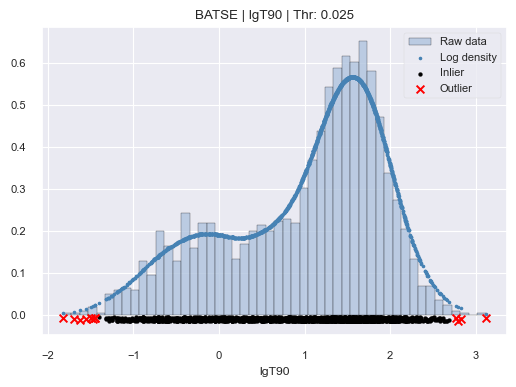

In [63]:
batse_outliers_t90 = data_operations.find_outliers(
    data=df_batse_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.025,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Spectral Hardness (lgHrd)

Data is read from "../datasets/batse.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [64]:
df_batse_hrd = data_operations.load(cat_name="batse", feats=["lgHrd"])
df_batse_hrd.sample(5)

,lgHrd
trigger_num,
6593,0.618595
2252,0.613027
7597,0.509379
2119,0.752544
7290,1.168276


Threshold density for Kernel Density Estimation algorithm is set to 0.02. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2095
Number of outliers: 14
Number of inliers: 2081


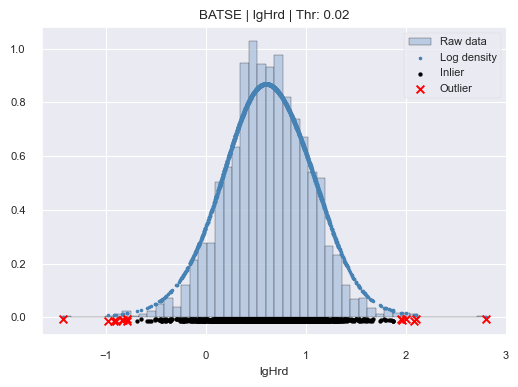

In [65]:
batse_outliers_hrd = data_operations.find_outliers(
    data=df_batse_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.02,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [66]:
data_operations.check_for_normality(data=batse_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.999, p=0.263
  > Sample looks Gaussian (fail to reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.017, p=0.616
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=0.428
  > Critical values: [0.575 0.655 0.785 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample looks Gaussian (fail to reject H0) at the 15.0% level
  > Sample looks Gaussian (fail to reject H0) at the 10.0% level
  > Sample looks Gaussian (fail to reject H0) at the 5.0% level
  > Sample looks Gaussian (fail to reject H0) at the 2.5% level
  > Sample looks Gaussian (fail to reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=0.685, p=0.710
  > Sample looks Gaussian (fail to reject H0)


### c. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/batse.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [67]:
df_batse_t90_hrd = data_operations.load(cat_name="batse", feats=["lgT90", "lgHrd"])
df_batse_t90_hrd.sample(5)

,lgT90,lgHrd
trigger_num,,
2894,0.577032,0.844461
6159,1.698275,0.060179
6339,1.182757,1.044111
1551,1.468938,1.247598
2090,1.581426,0.657938


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1937
Number of outliers: 13
Number of inliers: 1924


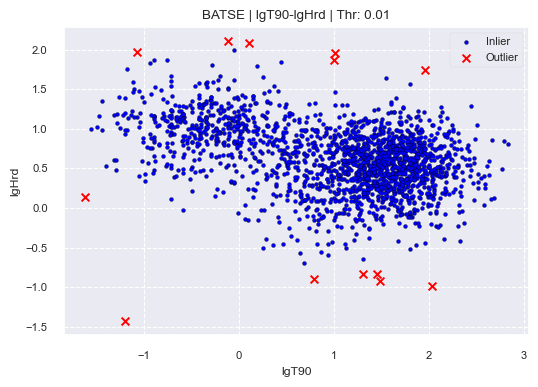

In [68]:
batse_outliers_t90_hrd = data_operations.find_outliers(
    data=df_batse_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.01,
    cat_name="batse",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

-----

## 2. FERMI

### a. Duration (lgT90)

Data is read from "../datasets/fermi.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [3]:
df_fermi_t90 = data_operations.load(cat_name="fermi", feats=["lgT90"])
df_fermi_t90.sample(5)

,lgT90
1053,-0.047692
0,0.632255
2352,1.204120
1166,-0.047692
677,0.577032


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 3568
Number of outliers: 13
Number of inliers: 3555


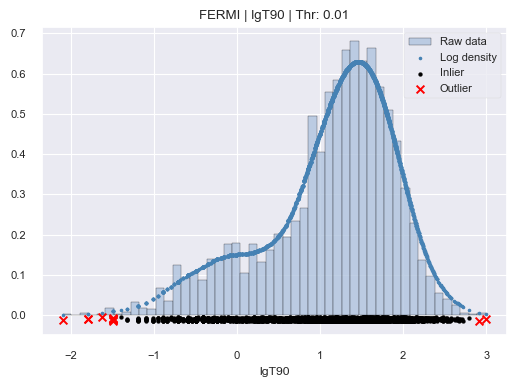

In [70]:
fermi_outliers_t90 = data_operations.find_outliers(
    data=df_fermi_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.01,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Spectral Hardness (lgHrd)

Data is read from "../datasets/fermi.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [4]:
df_fermi_hrd = data_operations.load(cat_name="fermi", feats=["lgHrd"])
df_fermi_hrd.sample(5)

,lgHrd
1537,0.212963
108,0.181461
1930,0.485879
2734,0.337162
555,0.795480


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2311
Number of outliers: 20
Number of inliers: 2291


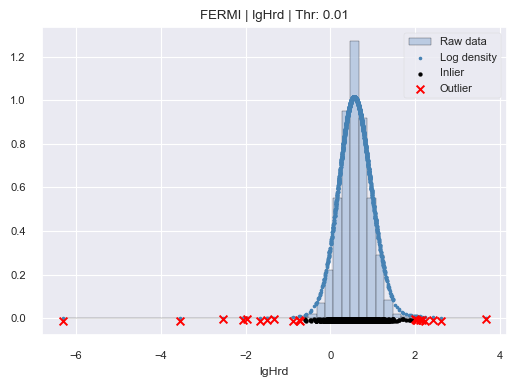

In [5]:
fermi_outliers_hrd = data_operations.find_outliers(
    data=df_fermi_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.01,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [6]:
data_operations.check_for_normality(data=fermi_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.997, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.029, p=0.041
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=1.732
  > Critical values: [0.575 0.655 0.786 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=20.142, p=0.000
  > Sample does not look Gaussian (reject H0)


### c. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/fermi.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [74]:
df_fermi_t90_hrd = data_operations.load(cat_name="fermi", feats=["lgT90", "lgHrd"])
df_fermi_t90_hrd.sample(5)

,lgT90,lgHrd
1623,1.156428,0.866501
3537,0.449633,0.644150
640,0.638689,0.658848
1799,2.069113,0.418323
2492,-0.415669,1.069097


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 2310
Number of outliers: 19
Number of inliers: 2291


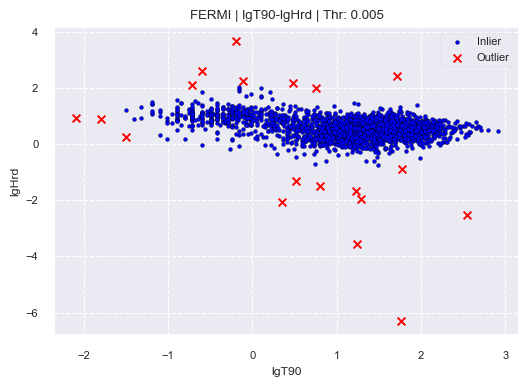

In [75]:
fermi_outliers_t90_hrd = data_operations.find_outliers(
    data=df_fermi_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.005,
    cat_name="fermi",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

----

## 3. SWIFT

### a. Duration (lgT90)

Data is read from "../datasets/swift.xlsx" and duration (lgT90) feature space is loaded. Five random samples are printed.

In [76]:
df_swift_t90 = data_operations.load(cat_name="swift", feats=["lgT90"])
df_swift_t90.sample(5)

,lgT90
818,0.859258
6,1.754318
201,1.755082
1137,1.518514
165,1.653213


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1503
Number of outliers: 9
Number of inliers: 1494


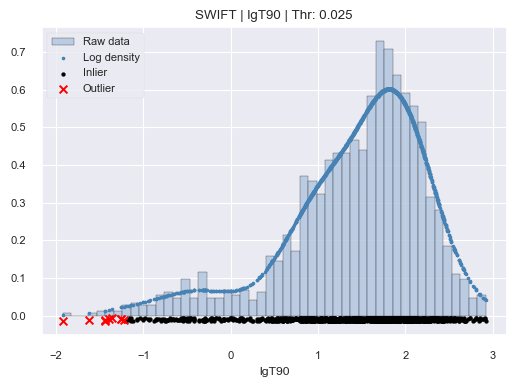

In [77]:
swift_outliers_t90 = data_operations.find_outliers(
    data=df_swift_t90.copy(),
    feat_space=["lgT90"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### b. Intrinsic Duration (lgT90i)

Data is read from "../datasets/swift.xlsx" and intrinsic duration (lgT90i) feature space is loaded. Five random samples are printed.

In [78]:
df_swift_t90i = data_operations.load(cat_name="swift", feats=["lgT90i"])
df_swift_t90i.sample(5)

,lgT90i
911,2.129687
1294,0.406225
710,2.075233
346,1.163876
990,1.876995


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 484
Number of outliers: 4
Number of inliers: 480


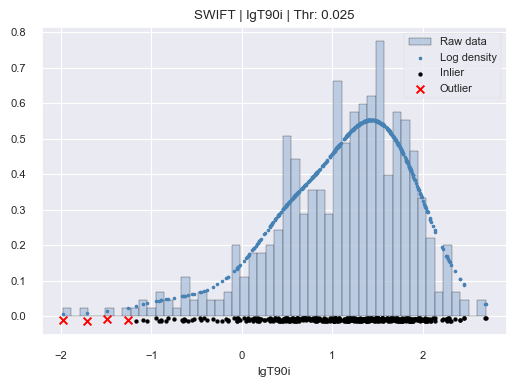

In [79]:
swift_outliers_t90i = data_operations.find_outliers(
    data=df_swift_t90i.copy(),
    feat_space=["lgT90i"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    figsize=(6, 4),
    verbose=True,
)

### c. Spectral Hardness (lgHrd)

Data is read from "../datasets/swift.xlsx" and spectral hardness (lgHrd) feature space is loaded. Five random samples are printed.

In [7]:
df_swift_hrd = data_operations.load(cat_name="swift", feats=["lgHrd"])
df_swift_hrd.sample(5)

,lgHrd
830,-0.23773
1317,-0.12801
932,-0.08802
1189,-0.07139
327,-0.25251


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1490
Number of outliers: 5
Number of inliers: 1485


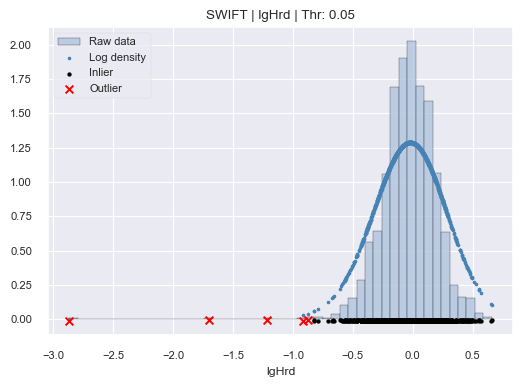

In [8]:
swift_outliers_hrd = data_operations.find_outliers(
    data=df_swift_hrd.copy(),
    feat_space=["lgHrd"],
    threshold_density=0.05,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

Several tests are done to assess if the data (after eliminating outliers) follows a normal distribution.

In [9]:
data_operations.check_for_normality(data=swift_outliers_hrd, feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.996, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.029, p=0.148
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=1.538
  > Critical values: [0.574 0.654 0.785 0.916 1.089]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=17.220, p=0.000
  > Sample does not look Gaussian (reject H0)


### d. Luminosity (lgLum)

Data is read from "../datasets/swift.xlsx" and luminosity (lgLum) feature space is loaded. Five random samples are printed.

In [83]:
df_swift_lum = data_operations.load(cat_name="swift", feats=["lgLum"])
df_swift_lum.sample(5)

,lgLum
1384,51.609509
1061,51.113571
484,50.984127
1457,51.742282
254,51.484180


Threshold density for Kernel Density Estimation algorithm is set to 0.025. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 10
Number of inliers: 463


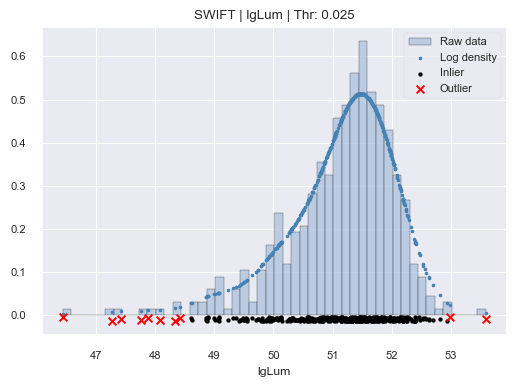

In [84]:
swift_outliers_lum = data_operations.find_outliers(
    data=df_swift_lum.copy(),
    feat_space=["lgLum"],
    threshold_density=0.025,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### e. Duration-Spectral Hardness (lgT90-lgHrd)

Data is read from "../datasets/swift.xlsx", duration (lgT90) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [85]:
df_swift_t90_hrd = data_operations.load(cat_name="swift", feats=["lgT90", "lgHrd"])
df_swift_t90_hrd.sample(5)

,lgT90,lgHrd
76,1.851723,-0.31074
1109,1.579784,-0.06284
44,1.890041,0.04482
494,0.789299,-0.46727
285,-1.075721,-1.70411


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 1477
Number of outliers: 7
Number of inliers: 1470


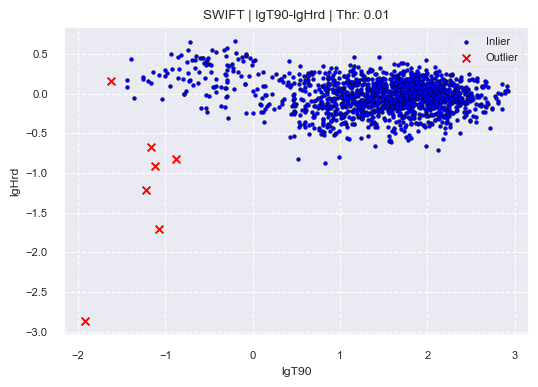

In [86]:
swift_outliers_t90_hrd = data_operations.find_outliers(
    data=df_swift_t90_hrd.copy(),
    feat_space=["lgT90", "lgHrd"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### f. Intrinsic Duration-Spectral Hardness (lgT90i-lgHrd)

Data is read from "../datasets/swift.xlsx", intrinsic duration (lgT90i) and spectral hardness (lgHrd) feature spaces are loaded. Five random samples are printed.

In [87]:
df_swift_t90i_hrd = data_operations.load(cat_name="swift", feats=["lgT90i", "lgHrd"])
df_swift_t90i_hrd.sample(5)

,lgT90i,lgHrd
29,1.832551,0.00839
404,0.910046,-0.05399
998,-1.485880,0.16727
911,2.129687,-0.13813
961,1.967220,0.07518


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 478
Number of outliers: 3
Number of inliers: 475


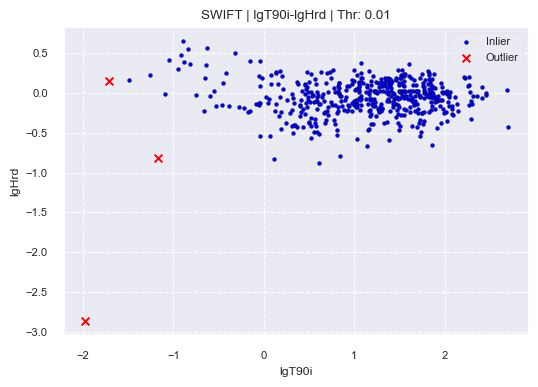

In [88]:
swift_outliers_t90i_hrd = data_operations.find_outliers(
    data=df_swift_t90i_hrd.copy(),
    feat_space=["lgT90i", "lgHrd"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### g. Spectral Hardness-Luminosity (lgHrd-lgLum)

Data is read from "../datasets/swift.xlsx", spectral hardness (lgHrd) and lumşinosity (lgLum) feature spaces are loaded. Five random samples are printed.

In [89]:
df_swift_hrd_lum = data_operations.load(cat_name="swift", feats=["lgHrd", "lgLum"])
df_swift_hrd_lum.sample(5)

,lgHrd,lgLum
869,0.10087,51.877536
95,-0.48461,51.004125
890,0.55471,51.040376
45,0.14387,52.269282
1472,0.36270,48.899325


Threshold density for Kernel Density Estimation algorithm is set to 0.01. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 7
Number of inliers: 466


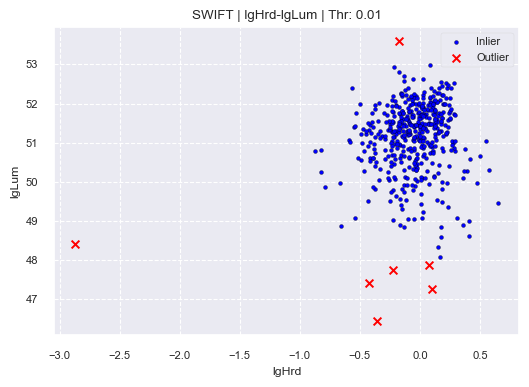

In [90]:
swift_outliers_hrd_lum = data_operations.find_outliers(
    data=df_swift_hrd_lum.copy(),
    feat_space=["lgHrd", "lgLum"],
    threshold_density=0.01,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    verbose=True,
    figsize=(6, 4),
)

### h. Intrinsic Duration-Spectral Hardness-Luminosity (lgT90i - lgHrd - lgLum)

Data is read from "../datasets/swift.xlsx", intrinsic duration (lgT90i), spectral hardness (lgHrd), and luminosity (lgLum) feature spaces are loaded. Five random samples are printed.

In [91]:
df_swift_t90i_hrd_lum = data_operations.load(
    cat_name="swift", feats=["lgT90i", "lgHrd", "lgLum"]
)
df_swift_t90i_hrd_lum.sample(5)

,lgT90i,lgHrd,lgLum
70,1.667160,-0.03197,51.136809
196,0.431517,-0.19605,51.299405
1189,1.130756,-0.07139,50.788782
1203,0.115854,-0.82235,50.814638
1484,0.740042,0.18793,52.460615


Threshold density for Kernel Density Estimation algorithm is set to 0.005. Outliers are determined. The number of all samples, inliers, and outliers are printed on the screen. The results are then plotted on a figure.

Total number of GRBs: 473
Number of outliers: 12
Number of inliers: 461


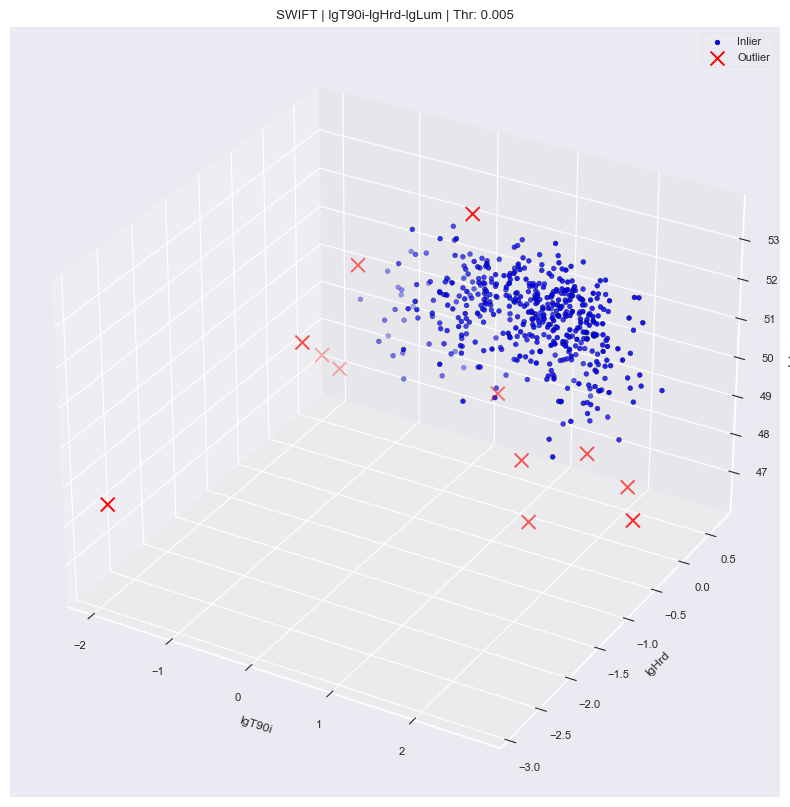

In [92]:
swift_outliers_t90i_hrd_lum = data_operations.find_outliers(
    data=df_swift_t90i_hrd_lum.copy(),
    feat_space=["lgT90i", "lgHrd", "lgLum"],
    threshold_density=0.005,
    cat_name="swift",
    save_data=True,
    plot_result=True,
    save_plot=True,
    figsize=(15, 10),
    verbose=True,
)

-----